In [8]:
def get_collection(client):
    db = client.get_database("memex")
    collection = db.get_collection("eventlog")
    return collection


def find_for(collection, kwargs):
    collection.find(kwargs).sort('datetime', pymongo.DESCENDING)

In [83]:
from cycler import cycler

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

colors = ['#1f77b4',
          '#ff7f0e',
          '#2ca02c',
          '#d62728',
          '#9467bd',
          '#8c564b',
          '#e377c2',
          '#7f7f7f',
          '#bcbd22',
          '#17becf',
          '#1a55FF']


colors_signal = [
    "#f94144",
    "#f8961e",
    "#f9c74f",
    "#90be6d",
    "#43aa8b",
]

In [13]:
event_log = get_collection(client)
res = list(find_for(event_log, {"provider": "daylio"}))

In [14]:
len(res)

117

In [61]:
from collections import defaultdict

data = {}
for item in res:
    val = item["datetime"].strftime("%d/%m/%Y")
    if item["mood"] == 'rad':
        key = 5
    elif item["mood"] == 'good':
        key = 4
    elif item["mood"] == 'meh':
        key = 3
    elif item["mood"] == 'bad':
        key = 2
    else:
        key = 1
        
    data[val] = key

In [123]:
def plot_line_mark_series(data, title: str, labels=None, figsize=(16, 4)):
    import matplotlib.patches as mpatches
    
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(1, 1, 1)
    
    x = list(data.keys())
    y = list(data.values())
    c = [colors_signal[i-1] for i in y]
    
    ax.plot(x, y)
    ax.scatter(x, y, marker='o', c=c, s=100)

    #ax.legend(handles=handles, labels=labels, loc="lower left", title="Classes")
    ax.set_ylim(ymin=1)
    
    plt.xticks(np.arange(1, len(x), 8.0))
    plt.title(title)
    plt.show()

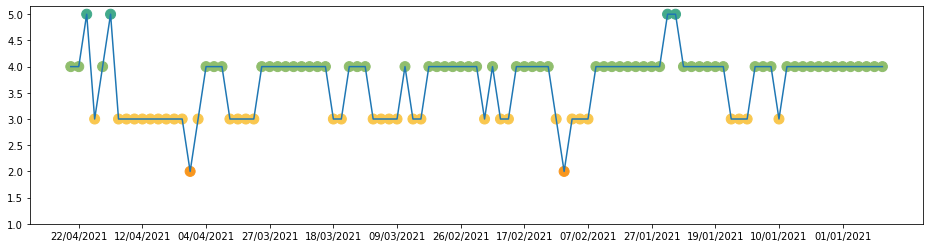

In [124]:
plot_line_mark_series(data, '', labels=['rad', 'good', 'meh', 'bad', 'awful'])